# One and two dimensions collisions

## One dimension

The energy and the momentum is conserved, and in the CM refernce frame it is zero. So the equations yield:
$$ v_{CM}= \frac{m_1v_1+m_2v_2}{m_1+m_2}$$
$$u_i = v_i-v_{CM}$$ 
$$m_1u_1+m_2u_2=0$$
 $$m_1U_1+m_2U_2=0$$
 $$ m_1u_1^2+m_2u_2^2 = m_1U_1^2+m_2U_2^2 $$

From which $U_1 = -u_1$, $U_2=-u_2$, and back in the original frame ($v_i = u_i-v_{CM}$) 
$$ V_i = -v_i + 2v_{CM} $$
$$ V_1 = \frac{m_2-m_1}{m_1+m_2}v_1+\frac{2m_2}{m_1+m_2}v_2 $$

In [52]:
import matplotlib.pyplot as plt
import matplotlib.animation as ani
import numpy as np
from IPython.display import display, clear_output, HTML
from scipy.integrate import solve_ivp

from physics import mover, handle_collisions

In [53]:
A = mover(mass = 2.0, v0 = 5, name = 'A', size = 0.5)
B = mover(mass = 1.0, v0 = -10, name = 'B', size = 0.5)
d = 1 #Dimensions of the system
N = 2 #Number of bodies in the system

#Calculating the starting point from the collision point (0.0)
DT = 2.0  #Time before impact
A.set_q([- A.v()*DT-A.size])
B.set_q([- B.v()*DT-B.size])

def collision(v1, v2):
  print(v1, v2)
  V1 = v2
  V2 = v1
  return V1, V2
  

In [54]:
dt = 0.01
t0, tf = -DT, DT
T = np.arange(t0, tf,dt)

#Differential function
def f(t,y):
  n = d*N
  q , p = y[0:n], y[n:2*n]
  if (np.abs(q[0]-q[1])-A.size-B.size<0):
    print(collision)
    p[0], p[1] = collision(p[0], p[1])
  
  dp = np.zeros(n)
  dq = p  
  return np.append(dq, dp)
  

y0 = np.array([A.q(), B.q(), A.v(), B.v()])

Y = solve_ivp(f, (t0, tf), y0, 'RK45', t_eval=T, dense_output=True, rtol = 1e-12)

bodies = [A, B]
N = len(bodies)
d = 1

for i in range(N):
  bodies[i].set_T(T)
  bodies[i].set_q(np.transpose(Y.y[i*d:(i+1)*d]))
  bodies[i].set_p(np.transpose(Y.y[(N+i)*d:(N+i+1)*d]))

<function collision at 0x7f81dd5bb640>
5.0 -10.0


In [55]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
fig.suptitle('1D collisions')
for a in [A,B]:
  a.marker, = ax.plot([-20,20],[-20,20], 'o')
  a.marker.set_label(a.name)
  
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid()
plt.legend()

plt.close('all')

In [56]:
def animate(i, n_frames=None, n_points=None):
  n = round(i*n_points/n_frames) #Mapping the number of points to be added for each frame
  for a in [A,B]:
    a.marker.set_data(a.q(n)[0], 0.0)  #Plot the positions

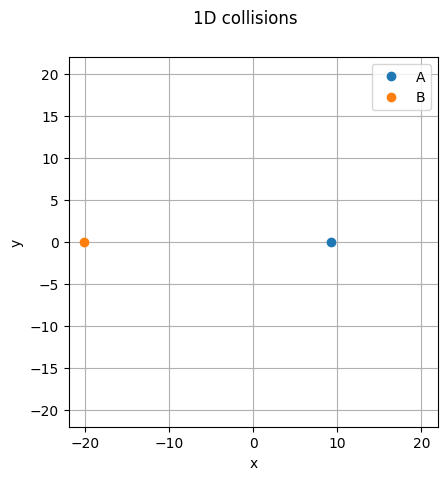

In [57]:
n_frames = 100
n_points = len(T)

for i in range(n_frames):
    animate(i, n_frames, n_points)
    clear_output(wait=True) 
    display(fig)

### Two dimension

The system lives in a plane. Now there are two components for the velocity, one parallel and one perpendicular to the direction of the collision $ \bm{u}_c = \frac{r_2-2_1}{|r_2-r_1|} $. So the conservation of energy is now given by 
$$ m_1u_{1,\parallel}^2+m_1u_{1,\perp}^2+m_2u_{2,\parallel}^2+m_2u_{2,\perp}^2 = m_1U_{1,\parallel}^2+m_1U_{1,\perp}^2+m_2U_{2,\parallel}^2+m_2U_{2,\perp}^2  $$  
Now there are 5 equations for 8 variables, but knowing that the force acts only on the direction of the collision, the perpendicular velocity doesn't change, and the change interests only the parallel one and it's the same as for the first case.  
Now $V= V_{\parallel} + V_{\perp} = V_{\perp} - V_{\parallel} +2 V_{CM, \parallel} = V + 2(V_{CM, \parallel}- V_{\parallel}) = V + 2(V_{CM}-V)_{\parallel}$  
This gives the final formula
$$ V_1 = v_1 + 2\frac{m_2}{m_1+m_2}\frac{(v_2-v_1)\cdot(r_2-r_1)}{||r_2-r_1||}(r_2-r_1) $$
